In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, BatchNormalization
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

In [2]:
img_rows, img_cols = 224, 224

MobileNet = MobileNet(weights='imagenet', include_top=False, input_shape=(img_rows, img_cols, 3))

In [4]:
for layer in MobileNet.layers:
    layer.trainable = True

# Opcional: ver capas
for i, layer in enumerate(MobileNet.layers):
    print(str(i), layer.__class__.__name__, layer.trainable)


0 InputLayer True
1 Conv2D True
2 BatchNormalization True
3 ReLU True
4 DepthwiseConv2D True
5 BatchNormalization True
6 ReLU True
7 Conv2D True
8 BatchNormalization True
9 ReLU True
10 ZeroPadding2D True
11 DepthwiseConv2D True
12 BatchNormalization True
13 ReLU True
14 Conv2D True
15 BatchNormalization True
16 ReLU True
17 DepthwiseConv2D True
18 BatchNormalization True
19 ReLU True
20 Conv2D True
21 BatchNormalization True
22 ReLU True
23 ZeroPadding2D True
24 DepthwiseConv2D True
25 BatchNormalization True
26 ReLU True
27 Conv2D True
28 BatchNormalization True
29 ReLU True
30 DepthwiseConv2D True
31 BatchNormalization True
32 ReLU True
33 Conv2D True
34 BatchNormalization True
35 ReLU True
36 ZeroPadding2D True
37 DepthwiseConv2D True
38 BatchNormalization True
39 ReLU True
40 Conv2D True
41 BatchNormalization True
42 ReLU True
43 DepthwiseConv2D True
44 BatchNormalization True
45 ReLU True
46 Conv2D True
47 BatchNormalization True
48 ReLU True
49 DepthwiseConv2D True
50 BatchNorma

In [5]:
def addTopModelMobileNet(bottom_model, num_classes):
    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)

    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.5)(top_model)

    top_model = Dense(2048, activation='relu')(top_model)
    top_model = Dropout(0.5)(top_model)

    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dropout(0.5)(top_model)

    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.3)(top_model)

    top_model = Dense(num_classes, activation='softmax')(top_model)

    return top_model

In [6]:
num_classes = 7
FC_Head = addTopModelMobileNet(MobileNet, num_classes)
model = Model(inputs=MobileNet.input, outputs=FC_Head)
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 18,444,487 (70.36 MB)

 Trainable params: 18,422,599 (70.28 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [8]:
train_data_dir = r'D:\entremiento_mobilnet_pruebas\fer2013\train'
validation_data_dir = r'D:\entremiento_mobilnet_pruebas\fer2013\test'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_rows, img_cols),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_rows, img_cols),
    batch_size=batch_size,
    class_mode='categorical'
)

print("Clases detectadas:", train_generator.class_indices)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Clases detectadas: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [9]:
checkpoint = ModelCheckpoint('emotion_face_mobilNet.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)

earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=5, verbose=1, factor=0.2, min_lr=0.0001)

callbacks = [earlystop, checkpoint, learning_rate_reduction]

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


In [10]:
nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
epochs = 25

history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size
)

c:\Users\jharo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 906ms/step - accuracy: 0.2855 - loss: 1.8880

c:\Users\jharo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_loss improved from inf to 1.61302, saving model to emotion_face_mobilNet.h5


897/897 ━━━━━━━━━━━━━━━━━━━━ 914s 1s/step - accuracy: 0.2856 - loss: 1.8878 - val_accuracy: 0.3654 - val_loss: 1.6130 - learning_rate: 0.0010
Epoch 2/25
  1/897 ━━━━━━━━━━━━━━━━━━━━ 28:08 2s/step - accuracy: 0.5000 - loss: 1.3887

c:\Users\jharo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_loss improved from 1.61302 to 1.61079, saving model to emotion_face_mobilNet.h5


897/897 ━━━━━━━━━━━━━━━━━━━━ 91s 100ms/step - accuracy: 0.5000 - loss: 1.3887 - val_accuracy: 0.3670 - val_loss: 1.6108 - learning_rate: 0.0010
Epoch 3/25
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4675 - loss: 1.4035
Epoch 3: val_loss improved from 1.61079 to 1.31661, saving model to emotion_face_mobilNet.h5


897/897 ━━━━━━━━━━━━━━━━━━━━ 991s 1s/step - accuracy: 0.4675 - loss: 1.4034 - val_accuracy: 0.5144 - val_loss: 1.3166 - learning_rate: 0.0010
Epoch 4/25
  1/897 ━━━━━━━━━━━━━━━━━━━━ 31:21 2s/step - accuracy: 0.6250 - loss: 1.3312
Epoch 4: val_loss did not improve from 1.31661
897/897 ━━━━━━━━━━━━━━━━━━━━ 110s 121ms/step - accuracy: 0.6250 - loss: 1.3312 - val_accuracy: 0.5103 - val_loss: 1.3213 - learning_rate: 0.0010
Epoch 5/25
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 771ms/step - accuracy: 0.5089 - loss: 1.3099
Epoch 5: val_loss improved from 1.31661 to 1.13622, saving model to emotion_face_mobilNet.h5


897/897 ━━━━━━━━━━━━━━━━━━━━ 718s 798ms/step - accuracy: 0.5089 - loss: 1.3099 - val_accuracy: 0.5635 - val_loss: 1.1362 - learning_rate: 0.0010
Epoch 6/25
  1/897 ━━━━━━━━━━━━━━━━━━━━ 9:09 613ms/step - accuracy: 0.4688 - loss: 1.4942
Epoch 6: val_loss did not improve from 1.13622
897/897 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.4688 - loss: 1.4942 - val_accuracy: 0.5626 - val_loss: 1.1386 - learning_rate: 0.0010
Epoch 7/25
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 615ms/step - accuracy: 0.5277 - loss: 1.2594
Epoch 7: val_loss did not improve from 1.13622
897/897 ━━━━━━━━━━━━━━━━━━━━ 576s 642ms/step - accuracy: 0.5277 - loss: 1.2594 - val_accuracy: 0.5734 - val_loss: 1.1367 - learning_rate: 0.0010
Epoch 8/25
  1/897 ━━━━━━━━━━━━━━━━━━━━ 9:11 616ms/step - accuracy: 0.5000 - loss: 1.3329
Epoch 8: val_loss improved from 1.13622 to 1.13351, saving model to emotion_face_mobilNet.h5


897/897 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.5000 - loss: 1.3329 - val_accuracy: 0.5732 - val_loss: 1.1335 - learning_rate: 0.0010
Epoch 9/25
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 616ms/step - accuracy: 0.5529 - loss: 1.2184
Epoch 9: val_loss did not improve from 1.13351
897/897 ━━━━━━━━━━━━━━━━━━━━ 578s 644ms/step - accuracy: 0.5529 - loss: 1.2184 - val_accuracy: 0.5525 - val_loss: 1.1763 - learning_rate: 0.0010
Epoch 10/25
  1/897 ━━━━━━━━━━━━━━━━━━━━ 9:12 617ms/step - accuracy: 0.5000 - loss: 1.4494
Epoch 10: val_loss did not improve from 1.13351
897/897 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.5000 - loss: 1.4494 - val_accuracy: 0.5543 - val_loss: 1.1701 - learning_rate: 0.0010
Epoch 11/25
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 699ms/step - accuracy: 0.5629 - loss: 1.1766
Epoch 11: val_loss improved from 1.13351 to 1.08344, saving model to emotion_face_mobilNet.h5


897/897 ━━━━━━━━━━━━━━━━━━━━ 673s 750ms/step - accuracy: 0.5629 - loss: 1.1766 - val_accuracy: 0.5974 - val_loss: 1.0834 - learning_rate: 0.0010
Epoch 12/25
  1/897 ━━━━━━━━━━━━━━━━━━━━ 9:11 616ms/step - accuracy: 0.5000 - loss: 1.3634
Epoch 12: val_loss did not improve from 1.08344
897/897 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.5000 - loss: 1.3634 - val_accuracy: 0.5975 - val_loss: 1.0857 - learning_rate: 0.0010
Epoch 13/25
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 665ms/step - accuracy: 0.5791 - loss: 1.1404
Epoch 13: val_loss improved from 1.08344 to 1.08166, saving model to emotion_face_mobilNet.h5


897/897 ━━━━━━━━━━━━━━━━━━━━ 622s 693ms/step - accuracy: 0.5791 - loss: 1.1404 - val_accuracy: 0.5999 - val_loss: 1.0817 - learning_rate: 0.0010
Epoch 14/25
  1/897 ━━━━━━━━━━━━━━━━━━━━ 9:09 613ms/step - accuracy: 0.6250 - loss: 1.2033
Epoch 14: val_loss improved from 1.08166 to 1.07897, saving model to emotion_face_mobilNet.h5


897/897 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.6250 - loss: 1.2033 - val_accuracy: 0.6016 - val_loss: 1.0790 - learning_rate: 0.0010
Epoch 15/25
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 614ms/step - accuracy: 0.5907 - loss: 1.1172
Epoch 15: val_loss improved from 1.07897 to 1.04532, saving model to emotion_face_mobilNet.h5


897/897 ━━━━━━━━━━━━━━━━━━━━ 576s 642ms/step - accuracy: 0.5907 - loss: 1.1172 - val_accuracy: 0.6138 - val_loss: 1.0453 - learning_rate: 0.0010
Epoch 16/25
  1/897 ━━━━━━━━━━━━━━━━━━━━ 9:16 621ms/step - accuracy: 0.5000 - loss: 1.4507
Epoch 16: val_loss improved from 1.04532 to 1.04219, saving model to emotion_face_mobilNet.h5


897/897 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.5000 - loss: 1.4507 - val_accuracy: 0.6155 - val_loss: 1.0422 - learning_rate: 0.0010
Epoch 17/25
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 614ms/step - accuracy: 0.6009 - loss: 1.0957
Epoch 17: val_loss did not improve from 1.04219
897/897 ━━━━━━━━━━━━━━━━━━━━ 575s 641ms/step - accuracy: 0.6009 - loss: 1.0957 - val_accuracy: 0.5876 - val_loss: 1.1019 - learning_rate: 0.0010
Epoch 18/25
  1/897 ━━━━━━━━━━━━━━━━━━━━ 8:56 599ms/step - accuracy: 0.5312 - loss: 1.3836
Epoch 18: val_loss did not improve from 1.04219
897/897 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - accuracy: 0.5312 - loss: 1.3836 - val_accuracy: 0.5882 - val_loss: 1.0964 - learning_rate: 0.0010
Epoch 19/25
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 612ms/step - accuracy: 0.6122 - loss: 1.0792
Epoch 19: val_loss improved from 1.04219 to 1.01436, saving model to emotion_face_mobilNet.h5


897/897 ━━━━━━━━━━━━━━━━━━━━ 574s 640ms/step - accuracy: 0.6122 - loss: 1.0792 - val_accuracy: 0.6182 - val_loss: 1.0144 - learning_rate: 0.0010
Epoch 20/25
  1/897 ━━━━━━━━━━━━━━━━━━━━ 9:07 611ms/step - accuracy: 0.7188 - loss: 0.8598
Epoch 20: val_loss improved from 1.01436 to 1.01357, saving model to emotion_face_mobilNet.h5


897/897 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.7188 - loss: 0.8598 - val_accuracy: 0.6186 - val_loss: 1.0136 - learning_rate: 0.0010
Epoch 21/25
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 612ms/step - accuracy: 0.6203 - loss: 1.0473
Epoch 21: val_loss did not improve from 1.01357
897/897 ━━━━━━━━━━━━━━━━━━━━ 574s 640ms/step - accuracy: 0.6203 - loss: 1.0473 - val_accuracy: 0.6091 - val_loss: 1.0428 - learning_rate: 0.0010
Epoch 22/25
  1/897 ━━━━━━━━━━━━━━━━━━━━ 9:07 611ms/step - accuracy: 0.7500 - loss: 0.9322
Epoch 22: val_loss did not improve from 1.01357
897/897 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - accuracy: 0.7500 - loss: 0.9322 - val_accuracy: 0.6087 - val_loss: 1.0420 - learning_rate: 0.0010
Epoch 23/25
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 620ms/step - accuracy: 0.6260 - loss: 1.0319
Epoch 23: val_loss did not improve from 1.01357
897/897 ━━━━━━━━━━━━━━━━━━━━ 582s 649ms/step - accuracy: 0.6260 - loss: 1.0319 - val_accuracy: 0.6191 - val_loss: 1.0281 - learning_rate: 0.0010
Epoch 24/25

897/897 ━━━━━━━━━━━━━━━━━━━━ 589s 657ms/step - accuracy: 0.6307 - loss: 1.0305 - val_accuracy: 0.6352 - val_loss: 0.9885 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 25.


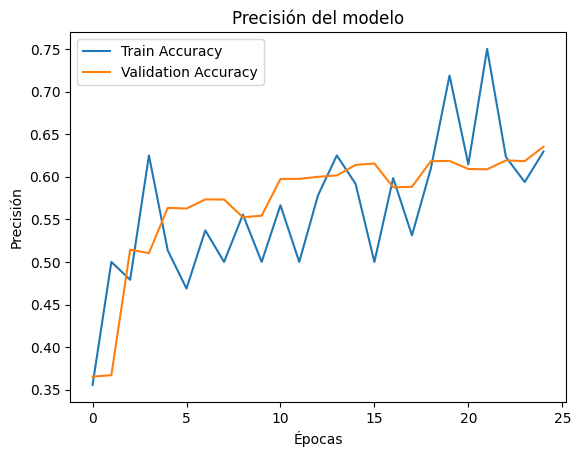

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Precisión del modelo")
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.show()